# Sparkify Project Workspace
This workspace contains a tiny subset (128MB) of the full dataset available (12GB). Feel free to use this workspace to build your project, or to explore a smaller subset with Spark before deploying your cluster on the cloud. Instructions for setting up your Spark cluster is included in the last lesson of the Extracurricular Spark Course content.

You can follow the steps below to guide your data analysis and model building portion of this project.

**Business Objective**
To find users that are about to either down grade or cancel the service. so that business can give them specail offers before they churn.



**Study Objective**
1. Explore similarity betwenn pandas & spark dataframes
2. Explore spark sql apis & description apis
3. conclude which is good for data analysis


Medium blog explins the project detedails and my experience in workign with spark. 
I had 2 objective, first a classification problem and second exploration of spark ecosystem. 
in future if i had to make choice between Spark vs Pandas which one to use ?
if its spark will it be spark sql or spark declaritive ?

So in below project , I did repetiative steps , in data exploration I did comparision between Pandas vs Spark. 
later in feature engeering section I compare spark sql & spark declaritive


blog link : https://medium.com/@odmirajkar/spark-vs-pandas-f149caa2d643

In [1]:
# import libraries
from pyspark.sql import SparkSession,Window
import pandas as pd
from pyspark.sql.functions import isnan, when, count, col,udf,max
from matplotlib import pyplot as plt 
import datetime
import re
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier,GBTClassifier
from pyspark.ml.feature import StandardScaler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [2]:
# create a Spark session
spark = SparkSession.builder \
    .master("local") \
    .appName("my_sparkify") \
    .getOrCreate()

df = spark.read.json('mini_sparkify_event_data.json')

In [3]:
df.createOrReplaceTempView("sparkify")

**Study Objective Reading Data and creating dataframe**
- Both spark and pandas can read data from various sources csv, json,dabase tables
- For Spark we can use spark.read. methodes
- For Pandas we have pd.read_ methods
- Spark dataframe can be converted into Pandas dataframe using toPandas method of dataframe


In [4]:
pd_df=df.toPandas()

# Load and Clean Dataset
In this workspace, the mini-dataset file is `mini_sparkify_event_data.json`. Load and clean the dataset, checking for invalid or missing data - for example, records without userids or sessionids. 

**Study Objective  Dimention properties of dataframe**
1. shape of dataframe
2. No of rows in dataframe
3. No of colunms in dataframe


In [5]:
print("No of rows in dataframe : ",df.count())
print("No of rows in dataframe : ",pd_df.shape[0])

No of rows in dataframe :  286500
No of rows in dataframe :  286500


In [6]:
print("No of colunms in dataframe : ",len(df.columns))
print("No of colunms in dataframe : ",pd_df.shape[1])

No of colunms in dataframe :  18
No of colunms in dataframe :  18


In [7]:
print("Colunms name in dataframe ",df.columns)
print("Colunms name in dataframe ",pd_df.columns)

Colunms name in dataframe  ['artist', 'auth', 'firstName', 'gender', 'itemInSession', 'lastName', 'length', 'level', 'location', 'method', 'page', 'registration', 'sessionId', 'song', 'status', 'ts', 'userAgent', 'userId']
Colunms name in dataframe  Index(['artist', 'auth', 'firstName', 'gender', 'itemInSession', 'lastName',
       'length', 'level', 'location', 'method', 'page', 'registration',
       'sessionId', 'song', 'status', 'ts', 'userAgent', 'userId'],
      dtype='object')


**Study Objective Summary of dataframe**
1. Describe each colunms along with its data type
2. Describe numeric stats of numeric data type

In [8]:
df.summary()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [9]:
pd_df.describe()

,itemInSession,length,registration,sessionId,status,ts
count,286500.000000,228108.000000,2.781540e+05,286500.000000,286500.000000,2.865000e+05
mean,114.414213,249.117182,1.535359e+12,1041.526555,210.054597,1.540957e+12
std,129.767262,99.235179,3.291322e+09,726.776263,31.505078,1.507544e+09
min,0.000000,0.783220,1.521381e+12,1.000000,200.000000,1.538352e+12
25%,27.000000,199.888530,1.533522e+12,336.000000,200.000000,1.539697e+12
50%,70.000000,234.500770,1.536664e+12,1013.000000,200.000000,1.540932e+12
75%,156.250000,277.158730,1.537672e+12,1675.000000,200.000000,1.542266e+12
max,1321.000000,3024.665670,1.543247e+12,2474.000000,404.000000,1.543799e+12


In [10]:
df.describe('itemInSession')

DataFrame[summary: string, itemInSession: string]

In [11]:
df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



**Study Objective Display dataframe**
1. First n rowns of dataframe
2. Display First n rows of a  colunms
3. display multiple colunms

In [12]:
df.show(5)

+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|          artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|  Martha Tilston|Logged In|    Colin|     M|           50| Freeman|277.89016| paid|     Bakersfield, CA|   PUT|NextSong|1538173362000|       29|           Rockpools|   200|1538352117000|Mozilla/5.0 (Wind...|    30|
|Five Iron Frenzy|Logged In|    Micah|     M|           79|    Long|236.09424| free|Boston-Cambridge-...|   PUT|NextSong|1538331630000| 

In [13]:
query=spark.sql("select * from sparkify Limit 5")
query.show()

+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|          artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|  Martha Tilston|Logged In|    Colin|     M|           50| Freeman|277.89016| paid|     Bakersfield, CA|   PUT|NextSong|1538173362000|       29|           Rockpools|   200|1538352117000|Mozilla/5.0 (Wind...|    30|
|Five Iron Frenzy|Logged In|    Micah|     M|           79|    Long|236.09424| free|Boston-Cambridge-...|   PUT|NextSong|1538331630000| 

In [14]:
pd_df.head(5)

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Rockpools,200,1538352117000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
1,Five Iron Frenzy,Logged In,Micah,M,79,Long,236.09424,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1.538332e+12,8,Canada,200,1538352180000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
2,Adam Lambert,Logged In,Colin,M,51,Freeman,282.82730,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Time For Miracles,200,1538352394000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
3,Enigma,Logged In,Micah,M,80,Long,262.71302,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1.538332e+12,8,Knocking On Forbidden Doors,200,1538352416000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
4,Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Harder Better Faster Stronger,200,1538352676000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30


In [15]:
df.take(3)

[Row(artist='Martha Tilston', auth='Logged In', firstName='Colin', gender='M', itemInSession=50, lastName='Freeman', length=277.89016, level='paid', location='Bakersfield, CA', method='PUT', page='NextSong', registration=1538173362000, sessionId=29, song='Rockpools', status=200, ts=1538352117000, userAgent='Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0', userId='30'),
 Row(artist='Five Iron Frenzy', auth='Logged In', firstName='Micah', gender='M', itemInSession=79, lastName='Long', length=236.09424, level='free', location='Boston-Cambridge-Newton, MA-NH', method='PUT', page='NextSong', registration=1538331630000, sessionId=8, song='Canada', status=200, ts=1538352180000, userAgent='"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36"', userId='9'),
 Row(artist='Adam Lambert', auth='Logged In', firstName='Colin', gender='M', itemInSession=51, lastName='Freeman', length=282.8273, level='paid', location='

In [16]:
pd_df.tail(2)

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
286498,None,Logged In,Emilia,F,44,House,NaN,paid,"New York-Newark-Jersey City, NY-NJ-PA",GET,About,1.538337e+12,500,None,200,1543622398000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011
286499,Camera Obscura,Logged In,Emilia,F,45,House,170.89261,paid,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.538337e+12,500,The Sun On His Back,200,1543622411000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011


In [17]:
df.select('artist').show(10)

+--------------------+
|              artist|
+--------------------+
|      Martha Tilston|
|    Five Iron Frenzy|
|        Adam Lambert|
|              Enigma|
|           Daft Punk|
|The All-American ...|
|The Velvet Underg...|
|        Starflyer 59|
|                null|
|            Frumpies|
+--------------------+
only showing top 10 rows



In [18]:
query=spark.sql("select artist from sparkify LIMIT 10")
query.show()

+--------------------+
|              artist|
+--------------------+
|      Martha Tilston|
|    Five Iron Frenzy|
|        Adam Lambert|
|              Enigma|
|           Daft Punk|
|The All-American ...|
|The Velvet Underg...|
|        Starflyer 59|
|                null|
|            Frumpies|
+--------------------+



In [19]:
pd_df['artist'].head(10)

0                   Martha Tilston
1                 Five Iron Frenzy
2                     Adam Lambert
3                           Enigma
4                        Daft Punk
5         The All-American Rejects
6    The Velvet Underground / Nico
7                     Starflyer 59
8                             None
9                         Frumpies
Name: artist, dtype: object

In [20]:
df.select(['artist','auth','firstName']).show(5)

+----------------+---------+---------+
|          artist|     auth|firstName|
+----------------+---------+---------+
|  Martha Tilston|Logged In|    Colin|
|Five Iron Frenzy|Logged In|    Micah|
|    Adam Lambert|Logged In|    Colin|
|          Enigma|Logged In|    Micah|
|       Daft Punk|Logged In|    Colin|
+----------------+---------+---------+
only showing top 5 rows



In [21]:
query=spark.sql("select artist,auth,firstName from sparkify LIMIT 10")
query.show()

+--------------------+---------+---------+
|              artist|     auth|firstName|
+--------------------+---------+---------+
|      Martha Tilston|Logged In|    Colin|
|    Five Iron Frenzy|Logged In|    Micah|
|        Adam Lambert|Logged In|    Colin|
|              Enigma|Logged In|    Micah|
|           Daft Punk|Logged In|    Colin|
|The All-American ...|Logged In|    Micah|
|The Velvet Underg...|Logged In|    Micah|
|        Starflyer 59|Logged In|    Colin|
|                null|Logged In|    Colin|
|            Frumpies|Logged In|    Colin|
+--------------------+---------+---------+



In [22]:
pd_df[['artist','auth','firstName']].head(5)

,artist,auth,firstName
0,Martha Tilston,Logged In,Colin
1,Five Iron Frenzy,Logged In,Micah
2,Adam Lambert,Logged In,Colin
3,Enigma,Logged In,Micah
4,Daft Punk,Logged In,Colin


**Study Objective Filtering Rows**
1. Fiter based on single colunms

In [23]:
df[df.userId == "300011"].show()

+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+-----------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|       page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+-----------+-------------+---------+--------------------+------+-------------+--------------------+------+
|             La Roux|Logged In|   Emilia|     F|            0|   House|233.11628| free|New York-Newark-J...|   PUT|   NextSong|1538336771000|       11|         Armour Love|   200|1538430493000|Mozilla/5.0 (comp...|300011|
|    Dropkick Murphys|Logged In|   Emilia|     F|            1|   House|233.53424| free|New York-Newark-J...

In [24]:
## using sql apis of spark
query=spark.sql("select * from sparkify where userId = '300011' LIMIT 10")
query.show()

+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|             La Roux|Logged In|   Emilia|     F|            0|   House|233.11628| free|New York-Newark-J...|   PUT|NextSong|1538336771000|       11|         Armour Love|   200|1538430493000|Mozilla/5.0 (comp...|300011|
|    Dropkick Murphys|Logged In|   Emilia|     F|            1|   House|233.53424| free|New York-Newark-J...|   PUT|Next

In [25]:
pd_df[pd_df['userId']=="300011"].head(5)

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
249009,La Roux,Logged In,Emilia,F,0,House,233.11628,free,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.538337e+12,11,Armour Love,200,1538430493000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011
249011,Dropkick Murphys,Logged In,Emilia,F,1,House,233.53424,free,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.538337e+12,11,The Dirty Glass,200,1538430726000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011
249013,Jack Johnson,Logged In,Emilia,F,2,House,196.20526,free,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.538337e+12,11,You And Your Heart,200,1538430959000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011
249015,Deana Carter,Logged In,Emilia,F,3,House,214.51710,free,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.538337e+12,11,She's Good For You,200,1538431155000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011
249017,Circle Of Dead Children,Logged In,Emilia,F,4,House,101.14567,free,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.538337e+12,11,Born On A Bomb Shell,200,1538431369000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011


In [26]:
df.filter(df.userId == "300011").show(5)

+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|             La Roux|Logged In|   Emilia|     F|            0|   House|233.11628| free|New York-Newark-J...|   PUT|NextSong|1538336771000|       11|         Armour Love|   200|1538430493000|Mozilla/5.0 (comp...|300011|
|    Dropkick Murphys|Logged In|   Emilia|     F|            1|   House|233.53424| free|New York-Newark-J...|   PUT|Next

In [27]:
df.filter((df.userId == "300011") & (df.artist =='Jack Johnson') ).show(5)

+------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------------------+------+-------------+--------------------+------+
|      artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|              song|status|           ts|           userAgent|userId|
+------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------------------+------+-------------+--------------------+------+
|Jack Johnson|Logged In|   Emilia|     F|            2|   House|196.20526| free|New York-Newark-J...|   PUT|NextSong|1538336771000|       11|You And Your Heart|   200|1538430959000|Mozilla/5.0 (comp...|300011|
|Jack Johnson|Logged In|   Emilia|     F|          133|   House|236.72118| paid|New York-Newark-J...|   PUT|NextSong|1538336771000|       54|       Bubble Toes|

In [28]:
query=spark.sql("select * from sparkify where userId = '300011' and artist = 'Jack Johnson' LIMIT 5")
query.show()


+------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------------------+------+-------------+--------------------+------+
|      artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|              song|status|           ts|           userAgent|userId|
+------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------------------+------+-------------+--------------------+------+
|Jack Johnson|Logged In|   Emilia|     F|            2|   House|196.20526| free|New York-Newark-J...|   PUT|NextSong|1538336771000|       11|You And Your Heart|   200|1538430959000|Mozilla/5.0 (comp...|300011|
|Jack Johnson|Logged In|   Emilia|     F|          133|   House|236.72118| paid|New York-Newark-J...|   PUT|NextSong|1538336771000|       54|       Bubble Toes|

In [29]:
pd_df[(pd_df['userId']=="300011") & (pd_df['artist'] =='Jack Johnson')].head(5)

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
249013,Jack Johnson,Logged In,Emilia,F,2,House,196.20526,free,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.538337e+12,11,You And Your Heart,200,1538430959000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011
249984,Jack Johnson,Logged In,Emilia,F,133,House,236.72118,paid,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.538337e+12,54,Bubble Toes,200,1538538394000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011
251769,Jack Johnson,Logged In,Emilia,F,37,House,207.64689,paid,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.538337e+12,80,Better Together,200,1538751282000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011
255571,Jack Johnson,Logged In,Emilia,F,71,House,212.87138,paid,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.538337e+12,112,Never Know,200,1539268213000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011
258411,Jack Johnson,Logged In,Emilia,F,0,House,185.99138,paid,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.538337e+12,156,Crying Shame,200,1539546866000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,300011


**Grouping the result**
1. Grouping results based on one colunm
2. Grouping results based on more than one colunm

In [30]:
df.groupBy('userId').count().show(5)

+------+-----+
|userId|count|
+------+-----+
|100010|  381|
|200002|  474|
|   125|   11|
|    51| 2464|
|   124| 4825|
+------+-----+
only showing top 5 rows



In [31]:
query=spark.sql("select count(*),userID from sparkify group by userId")
query.show(5)

+--------+------+
|count(1)|userID|
+--------+------+
|     381|100010|
|     474|200002|
|      11|   125|
|    2464|    51|
|    4825|   124|
+--------+------+
only showing top 5 rows



In [32]:
pd_df.groupby('userId').count()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent
userId,,,,,,,,,,,,,,,,,
,0,8346,0,0,8346,0,0,8346,0,8346,8346,0,8346,0,8346,8346,0
10,673,795,795,795,795,795,673,795,795,795,795,795,795,673,795,795,795
100,2682,3214,3214,3214,3214,3214,2682,3214,3214,3214,3214,3214,3214,2682,3214,3214,3214
100001,133,187,187,187,187,187,133,187,187,187,187,187,187,133,187,187,187
100002,195,218,218,218,218,218,195,218,218,218,218,218,218,195,218,218,218
100003,51,78,78,78,78,78,51,78,78,78,78,78,78,51,78,78,78
100004,942,1245,1245,1245,1245,1245,942,1245,1245,1245,1245,1245,1245,942,1245,1245,1245
100005,154,216,216,216,216,216,154,216,216,216,216,216,216,154,216,216,216
100006,26,44,44,44,44,44,26,44,44,44,44,44,44,26,44,44,44


**Dealing with NaN values**


In [33]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+
|artist|auth|firstName|gender|itemInSession|lastName|length|level|location|method|page|registration|sessionId| song|status| ts|userAgent|userId|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+
| 58392|   0|     8346|  8346|            0|    8346| 58392|    0|    8346|     0|   0|        8346|        0|58392|     0|  0|     8346|     0|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+



In [34]:
query=spark.sql("select count(*) from sparkify where song is null")
query.show()

+--------+
|count(1)|
+--------+
|   58392|
+--------+



UserID & SessionID has no Nan Values

In [35]:
pd_df.isna().sum()

artist           58392
auth                 0
firstName         8346
gender            8346
itemInSession        0
lastName          8346
length           58392
level                0
location          8346
method               0
page                 0
registration      8346
sessionId            0
song             58392
status               0
ts                   0
userAgent         8346
userId               0
dtype: int64

In [36]:
#Removing data wisth invalid userid,sessionid

In [37]:
df.select('userId').dropDuplicates().sort('userId').show(10)

+------+
|userId|
+------+
|      |
|    10|
|   100|
|100001|
|100002|
|100003|
|100004|
|100005|
|100006|
|100007|
+------+
only showing top 10 rows



In [38]:
query=spark.sql("select distinct userId from sparkify order by userId")
query.show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|100001|
|100002|
|100003|
|100004|
|100005|
|100006|
|100007|
|100008|
|100009|
|100010|
|100011|
|100012|
|100013|
|100014|
|100015|
|100016|
|100017|
+------+
only showing top 20 rows



In [39]:
print("Total No records with blank userid : ", df.filter(df.userId == '').count())

Total No records with blank userid :  8346


In [40]:
query=spark.sql("select count(distinct sessionId) from sparkify")
query.show()


+-------------------------+
|count(DISTINCT sessionId)|
+-------------------------+
|                     2354|
+-------------------------+



In [41]:
query=spark.sql("select distinct sessionId from sparkify order by sessionId")
query.show()

+---------+
|sessionId|
+---------+
|        1|
|        2|
|        3|
|        4|
|        5|
|        6|
|        7|
|        8|
|        9|
|       10|
|       11|
|       12|
|       13|
|       15|
|       16|
|       17|
|       18|
|       19|
|       20|
|       21|
+---------+
only showing top 20 rows



In [42]:
query=spark.sql("select distinct sessionId from sparkify order by sessionId desc ")
query.show()

+---------+
|sessionId|
+---------+
|     2474|
|     2464|
|     2459|
|     2451|
|     2446|
|     2445|
|     2444|
|     2441|
|     2434|
|     2433|
|     2432|
|     2431|
|     2430|
|     2429|
|     2428|
|     2427|
|     2426|
|     2415|
|     2412|
|     2410|
+---------+
only showing top 20 rows



Ther is no invalid session ids

In [43]:
#Distinct page requests
df.select('page').dropDuplicates().show(30)

+--------------------+
|                page|
+--------------------+
|              Cancel|
|    Submit Downgrade|
|         Thumbs Down|
|                Home|
|           Downgrade|
|         Roll Advert|
|              Logout|
|       Save Settings|
|Cancellation Conf...|
|               About|
| Submit Registration|
|            Settings|
|               Login|
|            Register|
|     Add to Playlist|
|          Add Friend|
|            NextSong|
|           Thumbs Up|
|                Help|
|             Upgrade|
|               Error|
|      Submit Upgrade|
+--------------------+



Blank User id may represent anonymous sessions, as we have same number of rows missing first name and last name. since our aim is to itendify customer churn we can eliminate these rows 

Secondly there wont be anonymous user disconnecting the sevice , so those recods does not qualify for churn detections.

In [44]:
query=spark.sql("select count(*) from sparkify where userID='' and page='Cancellation Confirmation'")
query.show()

+--------+
|count(1)|
+--------+
|       0|
+--------+



In [45]:
clean_df= df.filter(df.userId != '')

In [46]:
clean_df.count()

278154

In [47]:
pd_df[pd_df['userId'] == ''].shape

(8346, 18)

In [48]:
pd_clean_df=pd_df[pd_df['userId'] != '']
pd_clean_df.shape

(278154, 18)

# Exploratory Data Analysis
When you're working with the full dataset, perform EDA by loading a small subset of the data and doing basic manipulations within Spark. In this workspace, you are already provided a small subset of data you can explore.

### Define Churn

Once you've done some preliminary analysis, create a column `Churn` to use as the label for your model. I suggest using the `Cancellation Confirmation` events to define your churn, which happen for both paid and free users. As a bonus task, you can also look into the `Downgrade` events.

### Explore Data
Once you've defined churn, perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned. You can start by exploring aggregates on these two groups of users, observing how much of a specific action they experienced per a certain time unit or number of songs played.

**Define Churn**
As eexplained in video, customer is defined as churn if
1. if user confirmed cancellation of service
2. if user downgrades their service from paid to free 

**Note**
There are multiple ways to tackle this problem
1. defined one single coumn churn, have it 1 if user is churn, and treat it like binary classification problem
    Pro - Simpler approach, can be first step in multi step project
    Cons - May not get good accuracy as technically we are trying to predict two values.
2. define one single counmn churn and with multiple values , 2 if cancelled, 1 if downgrade & 0 if neither, and consider this as multiclass classification problem.
    Pros- Business wise it make much sence as customer who are on verge of downgrading should be treated differently as customer cancelling
    Cons- bit complicated, also if customer downgrades & then cancel how to handle such cases. 
 
I have selected option 1, eventhough it may give lower accuracy it is as per requiremetn in video

In [49]:
query=spark.sql("select count( distinct userId) from sparkify where page ='Cancellation Confirmation' or page ='Submit Downgrade'")
query.show()

+----------------------+
|count(DISTINCT userId)|
+----------------------+
|                    92|
+----------------------+



In [50]:
query=spark.sql("select count( userId) from sparkify where page ='Cancellation Confirmation' or page ='Submit Downgrade'")
query.show()

+-------------+
|count(userId)|
+-------------+
|          115|
+-------------+



In [51]:
clean_df.groupBy('page').count().show()

+--------------------+------+
|                page| count|
+--------------------+------+
|              Cancel|    52|
|    Submit Downgrade|    63|
|         Thumbs Down|  2546|
|                Home| 10082|
|           Downgrade|  2055|
|         Roll Advert|  3933|
|              Logout|  3226|
|       Save Settings|   310|
|Cancellation Conf...|    52|
|               About|   495|
|            Settings|  1514|
|     Add to Playlist|  6526|
|          Add Friend|  4277|
|            NextSong|228108|
|           Thumbs Up| 12551|
|                Help|  1454|
|             Upgrade|   499|
|               Error|   252|
|      Submit Upgrade|   159|
+--------------------+------+



In [52]:
query=spark.sql("select count( distinct userId) from sparkify ")
query.show()

+----------------------+
|count(DISTINCT userId)|
+----------------------+
|                   226|
+----------------------+



**So 92 out of 225 users has chrun which is roughly 41% of total users have churn so we data looks good for classificiation problem**

In [53]:
temp_df=pd_clean_df[(pd_clean_df['page'] == 'Cancellation Confirmation') | (pd_clean_df['page'] == 'Submit Downgrade')]

In [54]:
temp_df['userId'].nunique(),pd_clean_df['userId'].nunique()

(92, 225)

[]

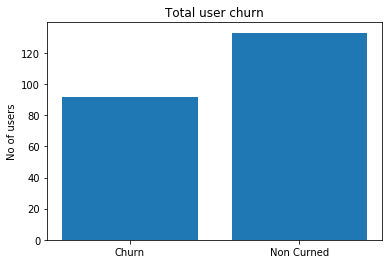

In [55]:
plt.bar(['Churn','Non Curned'],[temp_df['userId'].nunique(),pd_clean_df['userId'].nunique()-temp_df['userId'].nunique() ])
plt.ylabel('No of users')
plt.title('Total user churn')

plt.plot()

In [56]:
#Creating new colunms for downgrade
# define a downgrade label
downgrade_value  = udf(lambda x: 1 if x == "Submit Downgrade" else 0, IntegerType())
clean_df = clean_df.withColumn("downgrade_value", downgrade_value("page"))

# define a churn label
churn_value = udf(lambda x: 1 if x == 'Cancellation Confirmation' else 0, IntegerType())
clean_df = clean_df.withColumn("churn_value", churn_value("page"))

In [57]:
clean_df.select('userId','page','churn_value','downgrade_value').show(30)

+------+---------------+-----------+---------------+
|userId|           page|churn_value|downgrade_value|
+------+---------------+-----------+---------------+
|    30|       NextSong|          0|              0|
|     9|       NextSong|          0|              0|
|    30|       NextSong|          0|              0|
|     9|       NextSong|          0|              0|
|    30|       NextSong|          0|              0|
|     9|       NextSong|          0|              0|
|     9|       NextSong|          0|              0|
|    30|       NextSong|          0|              0|
|    30|Add to Playlist|          0|              0|
|    30|       NextSong|          0|              0|
|     9|       NextSong|          0|              0|
|     9|    Roll Advert|          0|              0|
|    30|       NextSong|          0|              0|
|     9|       NextSong|          0|              0|
|     9|      Thumbs Up|          0|              0|
|    30|       NextSong|          0|          

In [58]:
#Updating each user which has churned as Y.
clean_df.select('userId','page','churn_value','downgrade_value').filter((clean_df.churn_value==1) | (clean_df.downgrade_value ==1) ).show(10)

+------+--------------------+-----------+---------------+
|userId|                page|churn_value|downgrade_value|
+------+--------------------+-----------+---------------+
|   131|    Submit Downgrade|          0|              1|
|    38|    Submit Downgrade|          0|              1|
|   141|    Submit Downgrade|          0|              1|
|    18|Cancellation Conf...|          1|              0|
|    30|    Submit Downgrade|          0|              1|
|    20|    Submit Downgrade|          0|              1|
|    32|Cancellation Conf...|          1|              0|
|    12|    Submit Downgrade|          0|              1|
|    11|    Submit Downgrade|          0|              1|
|    61|    Submit Downgrade|          0|              1|
+------+--------------------+-----------+---------------+
only showing top 10 rows



cCreating a colunm to identify user has churn ,
Basically marking all the entries of this user as churn if eventually customer has churned
WE can do this in two ways,
1. using window function over records group by userID and if user has churn_value as 1 for any record we should mark it as churn
2. create udf , that take input as spark dataframe and userID, returns value as 1 if user has churned


In [59]:
# find all users who downgraded
dg_window = Window.partitionBy('UserId')
clean_df = clean_df.withColumn("user_downgrade", max('downgrade_value').over(dg_window))
clean_df = clean_df.withColumn("user_cancle", max('churn_value').over(dg_window))


In [60]:
chrun=udf(lambda x,y: x|y, IntegerType())
clean_df = clean_df.withColumn("user_churn", chrun("user_cancle","user_downgrade"))

In [61]:
#clean_df.drop('user_churn')

In [62]:
clean_df.select(['userId', 'firstName', 'level','user_churn', 'user_downgrade','user_cancle']).dropDuplicates(subset = ['userId']).show(20)

+------+---------+-----+----------+--------------+-----------+
|userId|firstName|level|user_churn|user_downgrade|user_cancle|
+------+---------+-----+----------+--------------+-----------+
|100010| Darianna| free|         0|             0|          0|
|200002|  Dominic| free|         0|             0|          0|
|   125|    Mason| free|         1|             0|          1|
|   124|   Nicole| paid|         0|             0|          0|
|    51|    Ethan| paid|         1|             0|          1|
|     7|   Maddox| free|         0|             0|          0|
|    15|    Panav| paid|         0|             0|          0|
|    54|    Alexi| paid|         1|             1|          1|
|   155|   Camila| free|         0|             0|          0|
|100014|  Rodrigo| paid|         1|             0|          1|
|   132|    Sadie| free|         0|             0|          0|
|   154|   Morgan| free|         0|             0|          0|
|   101|     Alex| free|         1|             0|     

In [63]:
clean_df.select(['userId', 'firstName', 'level','user_churn', 'user_downgrade','user_cancle']).filter((clean_df.user_downgrade ==1)& (clean_df.user_cancle ==0) ).dropDuplicates(subset = ['userId']).show(30)

+------+----------+-----+----------+--------------+-----------+
|userId| firstName|level|user_churn|user_downgrade|user_cancle|
+------+----------+-----+----------+--------------+-----------+
|    11|       Zoe| free|         1|             1|          0|
|    30|     Colin| paid|         1|             1|          0|
|    59|    Jaleel| free|         1|             1|          0|
|    85|   Brayden| free|         1|             1|          0|
|    35|      Lily| free|         1|             1|          0|
|100008|   Bryanna| paid|         1|             1|          0|
|300002|    Lindyn| free|         1|             1|          0|
|    96|Alexandria| paid|         1|             1|          0|
|   100|     Colin| paid|         1|             1|          0|
|    61|    Parker| free|         1|             1|          0|
|   131|      Kael| free|         1|             1|          0|
|   140|    Lucero| free|         1|             1|          0|
|300004|    Peyton| free|         1|    

In [64]:
df_ch_pd = clean_df.drop_duplicates(['userId', 'gender']).groupby(['user_churn', 'gender']).count().sort("user_churn").toPandas()


In [65]:
df_ch_pd

,user_churn,gender,count
0,0,M,72
1,0,F,61
2,1,F,43
3,1,M,49


as both male & female as churned and with more or less same percentge of users getting churn it may not be deciding factor in churn

In [66]:
clean_df.createOrReplaceTempView("sparkify")

In [67]:
query=spark.sql("select user_churn,avg(itemInSession) from sparkify group by user_churn")
query.show()

+----------+------------------+
|user_churn|avg(itemInSession)|
+----------+------------------+
|         1|108.24558629776021|
|         0|121.68204357516753|
+----------+------------------+



We can see churn users has less item in a session,indicating less songs played

In [68]:
query=spark.sql("select user_churn,count(song) from sparkify group by user_churn")
query.show()

+----------+-----------+
|user_churn|count(song)|
+----------+-----------+
|         1|     114545|
|         0|     113563|
+----------+-----------+



In [69]:
query=spark.sql("select user_churn,avg(length) from sparkify group by user_churn")
query.show()

+----------+------------------+
|user_churn|       avg(length)|
+----------+------------------+
|         1|249.10222253882736|
|         0|249.13227077384346|
+----------+------------------+



In [70]:
query=spark.sql("select user_churn,count(*) from sparkify where page ='Submit Upgrade' group by user_churn")
query.show()

+----------+--------+
|user_churn|count(1)|
+----------+--------+
|         1|      94|
|         0|      65|
+----------+--------+



In [71]:
query=spark.sql("select user_churn,count(*) from sparkify where page ='Thumbs Down' group by user_churn")
query.show()

+----------+--------+
|user_churn|count(1)|
+----------+--------+
|         1|    1401|
|         0|    1145|
+----------+--------+



In [72]:
print ("Average thumbbs down per user for churn user : ", 1401/92)
print ("Average thumbbs down per user for non churn user : ", 1145/(225-92))

Average thumbbs down per user for churn user :  15.228260869565217
Average thumbbs down per user for non churn user :  8.609022556390977


Churn users even though smaller in number has more thumbs down indicating poor service performance

In [73]:
query=spark.sql("select user_churn,count(*) from sparkify where page ='Error' group by user_churn")
query.show()

+----------+--------+
|user_churn|count(1)|
+----------+--------+
|         1|     112|
|         0|     140|
+----------+--------+



In [74]:
print ("Average error per user for churn user : ", 112/92)
print ("Average error per user for non churn user : ", 140/(225-92))

Average error per user for churn user :  1.2173913043478262
Average error per user for non churn user :  1.0526315789473684


In [75]:

query=spark.sql("select count(sessionId),user_churn from sparkify group by user_churn")
query.show()

+----------------+----------+
|count(sessionId)|user_churn|
+----------------+----------+
|          140415|         1|
|          137739|         0|
+----------------+----------+



In [76]:
#Save Settings
query=spark.sql("select count(*),user_churn from sparkify where page='Save Settings' group by user_churn")
query.show()

+--------+----------+
|count(1)|user_churn|
+--------+----------+
|     145|         1|
|     165|         0|
+--------+----------+



# Feature Engineering
Once you've familiarized yourself with the data, build out the features you find promising to train your model on. To work with the full dataset, you can follow the following steps.
- Write a script to extract the necessary features from the smaller subset of data
- Ensure that your script is scalable, using the best practices discussed in Lesson 3
- Try your script on the full data set, debugging your script if necessary

If you are working in the classroom workspace, you can just extract features based on the small subset of data contained here. Be sure to transfer over this work to the larger dataset when you work on your Spark cluster.

Based on data analysis done in earlier session.
below are important features
1. positive indicators
    1. Number of thumbs up
        - If user has thumps up then they have liked the then its positive single they liked the serive
    2. Number of songs played
    3. Number of artist played
    4. Number of friends recommended
        - If user has recommended service to user 
    5. Number of songs added to playlist
2. Negative indicators 
    1. Number of thumbs down
    2. Number of error received
    3. Number of help call received
    4. Number of settings changed
3. Independent indicators 
    1. Gender
    2. No of sessions

There will be users which will not have few features, since all the features listed above are of type integers so default value is 0 for any user missing these features. 

Now to add these missing users into dataframe I followed below steps for each new feature added 

- step1 prepare list of all users
- step2 create function that will create spark dataframe with userid & 0
- step3 create dataframe with userID & feature of interest
- step4 check if all users are present in dataset or not, if not call function created in step 2 and create new dataframe.
- step4 append newly createed dataframe witch existing dataframe

In [77]:
total_users=clean_df.select('userId').drop_duplicates().collect()

In [78]:
length=len(total_users)
uId_list=[]
for i in range(length):
    uId_list.append(total_users[i].userId)

In [79]:
def add_new_row(all_users,feat_df):
    uId= feat_df.select('userId').collect()
    length=len(uId)
    users=[]
    for i in range(length):
        users.append(uId[i].userId)
    
    new_df_list=[]
    for u in all_users:
        if u not in users:
            row=[u,0]
            new_df_list.append(row)
    new_df=spark.createDataFrame(new_df_list)     
    feat_df=feat_df.union(new_df)
    return feat_df

In [80]:
#1A Number of thumbs up

In [81]:
feat_1 = clean_df.select('userId', 'page').where(df.page == 'Thumbs Up').groupBy('userId').count().withColumnRenamed('count', 'tot_thumbs_up')
feat_1.show()
feat_1.count()

+------+-------------+
|userId|tot_thumbs_up|
+------+-------------+
|100010|           17|
|200002|           21|
|    51|          100|
|   124|          171|
|     7|            7|
|    54|          163|
|    15|           81|
|   155|           58|
|   132|           96|
|   154|           11|
|100014|           17|
|   101|           86|
|    11|           40|
|   138|           95|
|300017|          303|
|    29|          154|
|    69|           72|
|100021|           11|
|    42|          166|
|   112|            9|
+------+-------------+
only showing top 20 rows



220

5 users are missing from list 

In [82]:
feat_1=add_new_row(uId_list,feat_1)

In [83]:
feat_1.count()

225

In [84]:
#1B Number songs played
feat_2 = clean_df.select('userId', 'song').groupBy('userId').count().withColumnRenamed('count', 'tot_songs')
feat_2.show()

+------+---------+
|userId|tot_songs|
+------+---------+
|100010|      381|
|200002|      474|
|   125|       11|
|    51|     2464|
|   124|     4825|
|     7|      201|
|    54|     3437|
|    15|     2278|
|   155|     1002|
|   132|     2304|
|   154|      118|
|100014|      310|
|   101|     2149|
|    11|      848|
|   138|     2469|
|300017|     4428|
|    29|     3603|
|    69|     1342|
|100021|      319|
|    42|     4257|
+------+---------+
only showing top 20 rows



In [85]:
feat_2=spark.sql("select userID,count(song) tot_songs from sparkify where song is not null group by userId")
feat_2.show()
feat_2.count()

+------+---------+
|userID|tot_songs|
+------+---------+
|100010|      275|
|200002|      387|
|   125|        8|
|    51|     2111|
|   124|     4079|
|     7|      150|
|    54|     2841|
|    15|     1914|
|   155|      820|
|   132|     1928|
|   154|       84|
|100014|      257|
|   101|     1797|
|    11|      647|
|   138|     2070|
|300017|     3632|
|    29|     3028|
|    69|     1125|
|100021|      230|
|    42|     3573|
+------+---------+
only showing top 20 rows



225

In [86]:
#1C Number of artist played
feat_3 = clean_df.select('userId', 'artist').groupBy('userId').count().withColumnRenamed('count', 'tot_artist')
feat_3.show()
feat_3.count()

+------+----------+
|userId|tot_artist|
+------+----------+
|100010|       381|
|200002|       474|
|   125|        11|
|    51|      2464|
|   124|      4825|
|     7|       201|
|    54|      3437|
|    15|      2278|
|   155|      1002|
|   132|      2304|
|   154|       118|
|100014|       310|
|   101|      2149|
|    11|       848|
|   138|      2469|
|300017|      4428|
|    29|      3603|
|    69|      1342|
|100021|       319|
|    42|      4257|
+------+----------+
only showing top 20 rows



225

In [87]:
feat_3=spark.sql("select userID,count(artist) tot_artist from sparkify where artist is not null group by userId")
feat_3.show()
feat_3.count()

+------+----------+
|userID|tot_artist|
+------+----------+
|100010|       275|
|200002|       387|
|   125|         8|
|    51|      2111|
|   124|      4079|
|     7|       150|
|    54|      2841|
|    15|      1914|
|   155|       820|
|   132|      1928|
|   154|        84|
|100014|       257|
|   101|      1797|
|    11|       647|
|   138|      2070|
|300017|      3632|
|    29|      3028|
|    69|      1125|
|100021|       230|
|    42|      3573|
+------+----------+
only showing top 20 rows



225

In [88]:
#1d Number of friends recommended
feat_4=spark.sql("select userID,count(*) tot_friends from sparkify where page='Add Friend'  group by userId")
feat_4.show()
feat_4.count()

+------+-----------+
|userID|tot_friends|
+------+-----------+
|100010|          4|
|200002|          4|
|    51|         28|
|   124|         74|
|     7|          1|
|    54|         33|
|    15|         31|
|   155|         11|
|   132|         41|
|   154|          3|
|100014|          6|
|   101|         29|
|    11|          6|
|   138|         41|
|300017|         63|
|    29|         47|
|    69|         12|
|100021|          7|
|    42|         52|
|   112|          7|
+------+-----------+
only showing top 20 rows



206

In [89]:
feat_4=add_new_row(uId_list,feat_4)
feat_4.count()

225

In [90]:
#1E Number of songs added to playlist 
feat_5=spark.sql("select userID,count(*) tot_playlist from sparkify where page='Add to Playlist'  group by userId")
feat_5.show()
feat_5.count()

+------+------------+
|userID|tot_playlist|
+------+------------+
|100010|           7|
|200002|           8|
|    51|          52|
|   124|         118|
|     7|           5|
|    15|          59|
|    54|          72|
|   155|          24|
|   132|          38|
|   154|           1|
|100014|           7|
|   101|          61|
|    11|          20|
|   138|          67|
|300017|         113|
|    29|          89|
|    69|          33|
|100021|           7|
|    42|         104|
|   112|           7|
+------+------------+
only showing top 20 rows



215

In [91]:
feat_5=add_new_row(uId_list,feat_5)
feat_5.count()

225

In [92]:
#2A Number of thumbs down
feat_2A=spark.sql("select userID,count(*) tot_thumb_down from sparkify where page ='Thumbs Down' group by userID")
feat_2A.show()
feat_2A.count()

+------+--------------+
|userID|tot_thumb_down|
+------+--------------+
|100010|             5|
|200002|             6|
|    51|            21|
|   124|            41|
|     7|             1|
|    15|            14|
|    54|            29|
|   155|             3|
|   132|            17|
|100014|             3|
|   101|            16|
|    11|             9|
|   138|            24|
|300017|            28|
|    29|            22|
|    69|             9|
|100021|             5|
|    42|            25|
|   112|             3|
|    73|             7|
+------+--------------+
only showing top 20 rows



203

In [93]:
feat_2A=add_new_row(uId_list,feat_2A)
feat_2A.count()

225

In [94]:
#2B Number of error received Error
feat_2B=spark.sql("select userID,count(*) tot_errs from sparkify where page ='Error' group by userID")
feat_2B.show()
feat_2B.count()

+------+--------+
|userID|tot_errs|
+------+--------+
|   124|       6|
|    51|       1|
|     7|       1|
|    15|       2|
|    54|       1|
|   155|       3|
|   132|       3|
|   101|       3|
|    11|       1|
|   138|       1|
|300017|       5|
|    69|       4|
|100021|       2|
|    42|       7|
|    73|       1|
|200010|       1|
|    30|       1|
|   113|       3|
|    59|       4|
|   146|       1|
+------+--------+
only showing top 20 rows



117

In [95]:
feat_2B=add_new_row(uId_list,feat_2B)
feat_2B.count()

225

In [96]:
#2C Number of help call received
feat_2C=spark.sql("select userID,count(*) tot_help from sparkify where page ='Help' group by userID")
feat_2C.show()
feat_2C.count()

+------+--------+
|userID|tot_help|
+------+--------+
|100010|       2|
|200002|       2|
|    51|      12|
|   124|      23|
|     7|       1|
|    54|      17|
|    15|       8|
|   155|       9|
|   132|      16|
|   154|       1|
|100014|       2|
|   101|      12|
|    11|       3|
|   138|      13|
|300017|      27|
|    29|      28|
|    69|       7|
|   112|       1|
|    42|      20|
|    73|       4|
+------+--------+
only showing top 20 rows



192

In [97]:
feat_2C=add_new_row(uId_list,feat_2C)
feat_2C.count()

225

In [98]:
#2D Number of settings changed
feat_2D=spark.sql("select userID,count(*) tot_setting from sparkify where page ='Save Settings' group by userID")
feat_2D.show()
feat_2D.count()

+------+-----------+
|userID|tot_setting|
+------+-----------+
|    51|          1|
|   124|          6|
|     7|          1|
|    15|          2|
|    54|          3|
|   132|          4|
|    11|          2|
|   101|          2|
|   138|          4|
|300017|          3|
|    29|          4|
|    69|          1|
|   112|          3|
|    42|          7|
|    73|          1|
|   113|          3|
|    30|          1|
|300018|          2|
|300012|          1|
|100022|          2|
+------+-----------+
only showing top 20 rows



132

In [99]:
feat_2D=add_new_row(uId_list,feat_2D)
feat_2D.count()

225

In [100]:
#3A Gender of user
feat_3A = spark.sql("select distinct(userID),gender from sparkify")
feat_3A.show()

+------+------+
|userID|gender|
+------+------+
|    44|     F|
|    46|     F|
|    41|     F|
|    72|     F|
|300023|     F|
|    39|     F|
|100010|     F|
|    40|     F|
|    94|     F|
|    35|     F|
|    75|     F|
|   116|     F|
|200001|     M|
|200020|     M|
|100008|     F|
|200015|     M|
|   100|     M|
|100006|     F|
|300005|     F|
|    25|     F|
+------+------+
only showing top 20 rows



In [101]:
feat_3A=feat_3A.replace(['F', 'M'], ['0', '1'], 'gender').select('userId', col('gender').cast('int'))
feat_3A.show()

+------+------+
|userId|gender|
+------+------+
|    44|     0|
|    46|     0|
|    41|     0|
|    72|     0|
|300023|     0|
|    39|     0|
|100010|     0|
|    40|     0|
|    94|     0|
|    35|     0|
|    75|     0|
|   116|     0|
|200001|     1|
|200020|     1|
|100008|     0|
|200015|     1|
|   100|     1|
|100006|     0|
|300005|     0|
|    25|     0|
+------+------+
only showing top 20 rows



In [102]:
# Total length of listening utilizing all services
feat_3B = df.select("userId", 'length').groupBy('userId').sum().withColumnRenamed('sum(length)', 'tot_listen_time').dropDuplicates()
feat_3B.show()
feat_3B.count()

+------+------------------+
|userId|   tot_listen_time|
+------+------------------+
|100010| 66940.89735000003|
|200002| 94008.87593999993|
|   125|2089.1131000000005|
|    51| 523275.8428000004|
|   124|1012312.0927899999|
|     7| 38034.08710000002|
|    54| 711344.9195400011|
|    15|477307.60581000015|
|   155|       198779.2919|
|   132| 483118.9038399997|
|   154|20660.023910000007|
|100014| 67703.47208000004|
|   101| 447464.0146699989|
|    11|159669.96303999983|
|   138| 512449.8827599989|
|300017| 897406.9802100015|
|    29| 754517.5625700009|
|    69| 286064.0256399999|
|100021| 57633.17563999999|
|    42| 881792.9661300007|
+------+------------------+
only showing top 20 rows



226

In [103]:
feat_3C = df.select('userId', 'registration', 'ts').withColumn('tot_lifetime', (df.ts - df.registration))\
    .groupBy('userId').agg({'tot_lifetime' : 'max'})\
    .withColumnRenamed('max(tot_lifetime)', 'tot_lifetime')\
    .select('userId', (col('tot_lifetime')/1000/3600/24).alias('tot_lifetime'))
feat_3C.show()

+------+------------------+
|userId|      tot_lifetime|
+------+------------------+
|100010|  55.6436574074074|
|200002| 70.07462962962963|
|   125| 71.31688657407408|
|    51|19.455844907407407|
|   124|131.55591435185184|
|     7| 72.77818287037037|
|    54|110.75168981481481|
|    15|56.513576388888886|
|   155|23.556018518518517|
|   132|  66.8891087962963|
|   154|23.872037037037035|
|100014| 85.08340277777778|
|   101|53.965937499999995|
|    11|124.47825231481481|
|   138| 66.62668981481481|
|300017| 74.35851851851852|
|    29|60.104050925925925|
|    69| 71.42444444444445|
|100021| 64.73886574074074|
|    42| 67.11364583333334|
+------+------------------+
only showing top 20 rows



In [104]:
feat_4A=spark.sql("select distinct(userId),user_cancle from sparkify")
feat_4A.show()
feat_4A.count()

+------+-----------+
|userId|user_cancle|
+------+-----------+
|100010|          0|
|200002|          0|
|   125|          1|
|   124|          0|
|    51|          1|
|     7|          0|
|    15|          0|
|    54|          1|
|   155|          0|
|100014|          1|
|   132|          0|
|   154|          0|
|   101|          1|
|    11|          0|
|   138|          0|
|300017|          0|
|100021|          1|
|    29|          1|
|    69|          0|
|   112|          0|
+------+-----------+
only showing top 20 rows



225

In [105]:
feat_4B=spark.sql("select distinct(userId),user_downgrade from sparkify")
feat_4B.show()
feat_4B.count()

+------+--------------+
|userId|user_downgrade|
+------+--------------+
|100010|             0|
|200002|             0|
|   125|             0|
|   124|             0|
|    51|             0|
|     7|             0|
|    15|             0|
|    54|             1|
|   155|             0|
|100014|             0|
|   132|             0|
|   154|             0|
|   101|             0|
|    11|             1|
|   138|             0|
|300017|             0|
|100021|             0|
|    29|             0|
|    69|             0|
|   112|             0|
+------+--------------+
only showing top 20 rows



225

In [106]:
target = clean_df.select('userId', col('user_churn').alias('target')).dropDuplicates()
target.show()
target.count()

+------+------+
|userId|target|
+------+------+
|    19|     0|
|300007|     1|
|100005|     1|
|200007|     0|
|200002|     0|
|    25|     1|
|    50|     0|
|     8|     0|
|100011|     1|
|100012|     1|
|     4|     0|
|    65|     0|
|   101|     1|
|300015|     1|
|   153|     0|
|100014|     1|
|    42|     0|
|    62|     0|
|    94|     0|
|   114|     0|
+------+------+
only showing top 20 rows



225

In [111]:
final_data = feat_1.join(feat_2, 'userId', 'inner').join(feat_3, 'userId', 'inner').join(feat_4, 'userId', 'inner')\
             .join(feat_5, 'userId', 'inner').join(feat_2A, 'userId', 'inner').join(feat_2B, 'userId', 'inner')\
             .join(feat_2C, 'userId', 'inner').join(feat_2D, 'userId', 'inner').join(feat_3A, 'userId', 'inner').join(feat_3B, 'userId', 'inner').join(feat_3C, 'userId', 'inner').join(feat_4A, 'userId', 'inner').join(feat_4B, 'userId', 'inner').join(target, 'userId', 'inner').drop('userId')

final_data.show()

+-------------+---------+----------+-----------+------------+--------------+--------+--------+-----------+------+------------------+------------------+-----------+--------------+------+
|tot_thumbs_up|tot_songs|tot_artist|tot_friends|tot_playlist|tot_thumb_down|tot_errs|tot_help|tot_setting|gender|   tot_listen_time|      tot_lifetime|user_cancle|user_downgrade|target|
+-------------+---------+----------+-----------+------------+--------------+--------+--------+-----------+------+------------------+------------------+-----------+--------------+------+
|           17|      275|       275|          4|           7|             5|       0|       2|          0|     0| 66940.89735000003|  55.6436574074074|          0|             0|     0|
|           21|      387|       387|          4|           8|             6|       0|       2|          0|     1| 94008.87593999993| 70.07462962962963|          0|             0|     0|
|            0|        8|         8|          0|           0|         

In [112]:
final_data.count()

225

In [113]:
clean_df.select('userID').drop_duplicates().count()

225

In [114]:
#final_data.describe()

In [115]:
#final_data.describe().select("Summary","tot_thumbs_up","tot_songs","tot_artist","tot_thumb_down","tot_errs").show()

In [119]:
pd_final=final_data.toPandas()

In [120]:
#pd_final.describe()

In [121]:
non_churn =pd_final[pd_final['target'] == 0].shape[0]

In [122]:
churn=pd_final[pd_final['target'] == 1].shape[0]

([<matplotlib.patches.Wedge at 0x7f3eafa86d30>,
 [Text(-0.310576,1.05525,'non_churn'), Text(0.310576,-1.05525,'churn')])

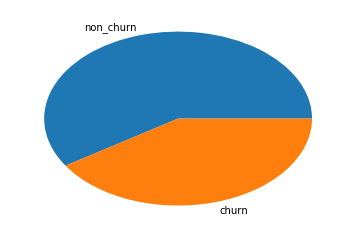

In [123]:
plt.pie([non_churn,churn],labels=['non_churn','churn'],)

# Modeling
Split the full dataset into train, test, and validation sets. Test out several of the machine learning methods you learned. Evaluate the accuracy of the various models, tuning parameters as necessary. Determine your winning model based on test accuracy and report results on the validation set. Since the churned users are a fairly small subset, I suggest using F1 score as the metric to optimize.

In [124]:
#combine all the features in one single feature vector.
cols=final_data.columns

In [125]:
cols

['tot_thumbs_up',
 'tot_songs',
 'tot_artist',
 'tot_friends',
 'tot_playlist',
 'tot_thumb_down',
 'tot_errs',
 'tot_help',
 'tot_setting',
 'gender',
 'tot_listen_time',
 'tot_lifetime',
 'user_cancle',
 'user_downgrade',
 'target']

In [126]:
cols.remove('target')

In [127]:
assembler = VectorAssembler(inputCols=cols,outputCol="features")
# Now let us use the transform method to transform our dataset
final_data=assembler.transform(final_data)
final_data.select("features").show()

+--------------------+
|            features|
+--------------------+
|[17.0,275.0,275.0...|
|[21.0,387.0,387.0...|
|(14,[1,2,9,10,11,...|
|[171.0,4079.0,407...|
|[100.0,2111.0,211...|
|[7.0,150.0,150.0,...|
|[81.0,1914.0,1914...|
|[163.0,2841.0,284...|
|[58.0,820.0,820.0...|
|[17.0,257.0,257.0...|
|[96.0,1928.0,1928...|
|(14,[0,1,2,3,4,7,...|
|[86.0,1797.0,1797...|
|[40.0,647.0,647.0...|
|[95.0,2070.0,2070...|
|[303.0,3632.0,363...|
|[11.0,230.0,230.0...|
|[154.0,3028.0,302...|
|[72.0,1125.0,1125...|
|[9.0,215.0,215.0,...|
+--------------------+
only showing top 20 rows



In [128]:
#2 Standardsize data 
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
final_data=standardscaler.fit(final_data).transform(final_data)
final_data.select("features","Scaled_features").show()

+--------------------+--------------------+
|            features|     Scaled_features|
+--------------------+--------------------+
|[17.0,275.0,275.0...|[0.25962948736535...|
|[21.0,387.0,387.0...|[0.32071877851013...|
|(14,[1,2,9,10,11,...|(14,[1,2,9,10,11,...|
|[171.0,4079.0,407...|[2.61156719643969...|
|[100.0,2111.0,211...|[1.52723227861970...|
|[7.0,150.0,150.0,...|[0.10690625950337...|
|[81.0,1914.0,1914...|[1.23705814568196...|
|[163.0,2841.0,284...|[2.48938861415012...|
|[58.0,820.0,820.0...|[0.88579472159942...|
|[17.0,257.0,257.0...|[0.25962948736535...|
|[96.0,1928.0,1928...|[1.46614298747491...|
|(14,[0,1,2,3,4,7,...|(14,[0,1,2,3,4,7,...|
|[86.0,1797.0,1797...|[1.31341975961294...|
|[40.0,647.0,647.0...|[0.61089291144788...|
|[95.0,2070.0,2070...|[1.45087066468872...|
|[303.0,3632.0,363...|[4.62751380421771...|
|[11.0,230.0,230.0...|[0.16799555064816...|
|[154.0,3028.0,302...|[2.35193770907434...|
|[72.0,1125.0,1125...|[1.09960724060618...|
|[9.0,215.0,215.0,...|[0.1374509

In [129]:
#create new dataframe with one target & scaled featyrs to be used for training
data = final_data.select(final_data.target.alias("label"), final_data.Scaled_features.alias("Scaled_features"))

In [130]:
data.show()

+-----+--------------------+
|label|     Scaled_features|
+-----+--------------------+
|    0|[0.25962948736535...|
|    0|[0.32071877851013...|
|    1|(14,[1,2,9,10,11,...|
|    0|[2.61156719643969...|
|    1|[1.52723227861970...|
|    0|[0.10690625950337...|
|    0|[1.23705814568196...|
|    1|[2.48938861415012...|
|    0|[0.88579472159942...|
|    1|[0.25962948736535...|
|    0|[1.46614298747491...|
|    0|(14,[0,1,2,3,4,7,...|
|    1|[1.31341975961294...|
|    1|[0.61089291144788...|
|    0|[1.45087066468872...|
|    0|[4.62751380421771...|
|    1|[0.16799555064816...|
|    1|[2.35193770907434...|
|    0|[1.09960724060618...|
|    0|[0.13745090507577...|
+-----+--------------------+
only showing top 20 rows



In [131]:
train, test = data.randomSplit([0.85, 0.15], seed=42)
train = train.cache()

In [132]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="label", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train)
predict_train=model.transform(train)
predict_test=model.transform(test)


In [133]:
predict_test.columns

['label', 'Scaled_features', 'rawPrediction', 'probability', 'prediction']

In [134]:
predict_test.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|     Scaled_features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|    0|[0.32071877851013...|[7.05467826137469...|[0.99913738427949...|       0.0|
|    0|[2.61156719643969...|[7.54784052601174...|[0.99947303036756...|       0.0|
|    1|[0.21381251900675...|[-6.0299130988969...|[0.00239992951009...|       1.0|
|    0|(14,[0,1,2,4,9,10...|[7.18027235052549...|[0.99923911895105...|       0.0|
|    0|(14,[0,1,2,3,10,1...|[5.71177380187436...|[0.99670409716867...|       0.0|
|    1|[0.68725452537886...|[-8.5577048055597...|[1.92022722473836...|       1.0|
|    1|[0.03054464557239...|[-9.5451320974437...|[7.15435900059261...|       1.0|
|    1|[0.10690625950337...|[-5.8076305307506...|[0.00299554058777...|       1.0|
|    0|[1.23705814568196...|[7.57567881254144...|[0.99948749057319...|       0.0|
|    0|[1.679955

In [136]:
predict_test.filter(predict_test.label == predict_test.prediction).count()

25

In [137]:
rf_clf = RandomForestClassifier(labelCol="label", featuresCol="Scaled_features")
f1_evaluation = MulticlassClassificationEvaluator(metricName = 'f1')
param_grid = ParamGridBuilder().build()

In [138]:
cross_val_rf = CrossValidator(estimator = rf_clf, estimatorParamMaps = param_grid, evaluator = f1_evaluation, numFolds = 2)


In [139]:
cv_model_rf = cross_val_rf.fit(train)

In [140]:
res_rf = cv_model_rf.transform(test)

In [141]:
# Getting different evaluation metrics for Random Forest
evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction")
print("The metrics for our Random Forest Classifier are as follows :")
print("The accuracy Score is {}".format(evaluator.evaluate(res_rf, {evaluator.metricName : "accuracy"})))
print("The F2 is {}".format(evaluator.evaluate(res_rf, {evaluator.metricName : "f1"})))

The metrics for our Random Forest Classifier are as follows :
The accuracy Score is 0.92
The F2 is 0.9207792207792207


In [142]:
gbt_clf = GBTClassifier(maxIter = 10, maxDepth = 10, seed = 42,labelCol="label", featuresCol="Scaled_features")

f1_evaluation = MulticlassClassificationEvaluator(metricName = 'f1')

param_grid = ParamGridBuilder().build()

cross_val_gbt = CrossValidator(estimator = gbt_clf, estimatorParamMaps = param_grid, evaluator = f1_evaluation, numFolds = 2)

In [143]:
cv_model_gbt = cross_val_gbt.fit(train)
cv_model_gbt.avgMetrics

[1.0]

In [144]:
res_gbt = cv_model_gbt.transform(test)
evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction")
print("The metrics for our Gradient Boosted Trees Classifier are as follows: ")
print("The F-1 Score is {}".format(evaluator.evaluate(res_gbt, {evaluator.metricName : "f1"})))
print("The accuracy is {}".format(evaluator.evaluate(res_gbt, {evaluator.metricName : "accuracy"})))

The metrics for our Gradient Boosted Trees Classifier are as follows: 
The F-1 Score is 1.0
The accuracy is 1.0


In [ ]:
# Tuning Hyperparameters for the Gradient Boosting Trees model using Grid Search
gbt_clf = GBTClassifier(maxIter = 15, seed = 42,labelCol="label", featuresCol="Scaled_features")

param_grid_gbt = ParamGridBuilder().addGrid(gbt_clf.maxIter, [10, 15, 20])\
                 .addGrid(gbt_clf.maxDepth, [5, 10]).build()

f1_evaluation = MulticlassClassificationEvaluator(metricName = 'f1')

cross_val_gbt = CrossValidator(estimator = gbt_clf, estimatorParamMaps = param_grid_gbt, evaluator = f1_evaluation, numFolds = 2)

In [ ]:
cv_model_gbt = cross_val_gbt.fit(train)
cv_model_gbt.avgMetrics

**STEP 2 -**

Removing customer cancel & custmer downgrage colunms, as although technically these are features derived from database, which we can use in data analysis. 
but in terms of business we want to detect churn before they reach to that step.

Also creating reusable function for classification problem

In [152]:
def churn_Detection(final_data):
    """
    Function will run churn detection on data set for sparkify application
    Param :- final_data, data frame to be used for churn detection
    output:- none, F1 score & accuracy of random forest alorithm on given dataframe will be printed on screen
    """
    #combine all the features in one single feature vector.
    cols=final_data.columns
    cols.remove('target')
    assembler = VectorAssembler(inputCols=cols,outputCol="features")
    # Now let us use the transform method to transform our dataset
    final_data=assembler.transform(final_data)
    #final_data.select("features").show()
    #2 Standardsize data 
    standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
    final_data=standardscaler.fit(final_data).transform(final_data)
    #final_data.select("features","Scaled_features").show()
    #Train test split
    data = final_data.select(final_data.target.alias("label"), final_data.Scaled_features.alias("Scaled_features"))
    train, test = data.randomSplit([0.85, 0.15], seed=42)
    train = train.cache()
    #running algorithm
    rf_clf = RandomForestClassifier(labelCol="label", featuresCol="Scaled_features")
    f1_evaluation = MulticlassClassificationEvaluator(metricName = 'f1')
    param_grid = ParamGridBuilder().build()
    cross_val_rf = CrossValidator(estimator = rf_clf, estimatorParamMaps = param_grid, evaluator = f1_evaluation, numFolds = 2)
    cv_model_rf = cross_val_rf.fit(train)
    res_rf = cv_model_rf.transform(test)
    # Getting different evaluation metrics for Random Forest
    evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction")
    print("The metrics for our Random Forest Classifier are as follows :")
    print("The accuracy Score is {}".format(evaluator.evaluate(res_rf, {evaluator.metricName : "accuracy"})))
    print("The F1 is {}".format(evaluator.evaluate(res_rf, {evaluator.metricName : "f1"})))

In [146]:
final_data = feat_1.join(feat_2, 'userId', 'inner').join(feat_3, 'userId', 'inner').join(feat_4, 'userId', 'inner')\
             .join(feat_5, 'userId', 'inner').join(feat_2A, 'userId', 'inner').join(feat_2B, 'userId', 'inner')\
             .join(feat_2C, 'userId', 'inner').join(feat_2D, 'userId', 'inner').join(feat_3A, 'userId', 'inner')\
             .join(feat_3B, 'userId', 'inner').join(feat_3C, 'userId', 'inner').join(target, 'userId', 'inner').drop('userId')

final_data.show()

+-------------+---------+----------+-----------+------------+--------------+--------+--------+-----------+------+------------------+------------------+------+
|tot_thumbs_up|tot_songs|tot_artist|tot_friends|tot_playlist|tot_thumb_down|tot_errs|tot_help|tot_setting|gender|   tot_listen_time|      tot_lifetime|target|
+-------------+---------+----------+-----------+------------+--------------+--------+--------+-----------+------+------------------+------------------+------+
|           17|      275|       275|          4|           7|             5|       0|       2|          0|     0| 66940.89735000003|  55.6436574074074|     0|
|           21|      387|       387|          4|           8|             6|       0|       2|          0|     1| 94008.87593999993| 70.07462962962963|     0|
|            0|        8|         8|          0|           0|             0|       0|       0|          0|     1|2089.1131000000005| 71.31688657407408|     1|
|          171|     4079|      4079|         7

In [153]:
churn_Detection(final_data)

The metrics for our Random Forest Classifier are as follows :
The accuracy Score is 0.6
The F1 is 0.6000000000000001


# Final Steps
Clean up your code, adding comments and renaming variables to make the code easier to read and maintain. Refer to the Spark Project Overview page and Data Scientist Capstone Project Rubric to make sure you are including all components of the capstone project and meet all expectations. Remember, this includes thorough documentation in a README file in a Github repository, as well as a web app or blog post.

**Business Objective**
with accuracy closer to 60% I think, I have met business object. Although I can improve the accuracy, clearly by doing more inteligent feature selection. 


**Learning Objective**
I learned a lot in this exercise. I explore pandas vs spark dataframe and also spark sql vs spark declarrivtive 
I must admit I prefered spark sql and ended up using more spqrk sql APIS.

**blog link** : https://medium.com/@odmirajkar/spark-vs-pandas-f149caa2d643

**Future Steps**

Although Accuracy may seems low but I think one reason is I have defined churn as downgraded as well as cancelled users, These are technically two different types of churn and should be treated differently. so in next iteration i will create two classifiers to identify churn and downgrading users